In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./DSBDALExam_DataSets/HeartDisease/Cleavland.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
col = "age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"
col_names = {}
j = 0
for i in col:
    col_names[j] = i
    j = j+1
col_names

{0: 'age',
 1: 'sex',
 2: 'cp',
 3: 'trestbps',
 4: 'chol',
 5: 'fbs',
 6: 'restecg',
 7: 'thalach',
 8: 'exang',
 9: 'oldpeak',
 10: 'slope',
 11: 'ca',
 12: 'thal',
 13: 'num'}

In [4]:
df = df.rename(columns = col_names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
(df == "?").sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
df.replace("?", pd.NA, inplace=True)
df = df.dropna()

In [8]:
(df == "?").sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
def replace_val(x):
    if type(x) == str:
        return x
    if x<0:
        return np.nan
    else:
        return x

In [10]:
df = df.applymap(replace_val)
df = df.dropna()

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [12]:
# df["sex"] = df["sex"].replace({1: "Male", 0: "Female"})
# df

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [14]:
X = df.drop(["num", "chol", "fbs", "restecg", "trestbps", "age", "sex", "slope"], axis=1)
y = df["num"]

print(X, y)

     cp  thalach  exang  oldpeak ca thal
0     1      150      0      2.3  0    6
1     4      108      1      1.5  3    3
2     4      129      1      2.6  2    7
3     3      187      0      3.5  0    3
4     2      172      0      1.4  0    3
..   ..      ...    ...      ... ..  ...
297   4      123      1      0.2  0    7
298   1      132      0      1.2  0    7
299   4      141      0      3.4  2    7
300   4      115      1      1.2  1    7
301   2      174      0      0.0  1    3

[297 rows x 6 columns] 0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 297, dtype: int64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
reg = LogisticRegression(max_iter=10000)
reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [17]:
y_pred = reg.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 3, 0, 0, 1, 3, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 4, 2, 3, 3, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 0])

In [18]:
accuracy_score(y_test, y_pred)

0.6333333333333333

In [19]:
knn = KNeighborsClassifier()
model = knn.fit(x_train, y_train)

In [20]:
y_pred = model.predict(x_test)

In [21]:
accuracy_score(y_pred, y_test)

0.6111111111111112

In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

In [48]:
df["ca"] = df["ca"].astype(int)

In [49]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 34.8+ KB


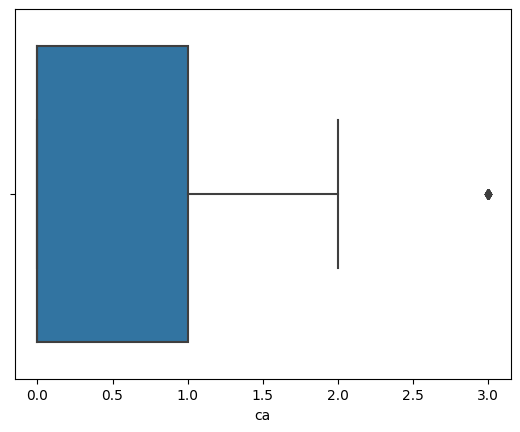

In [51]:
sns.boxplot(x=df["ca"])
plt.show()

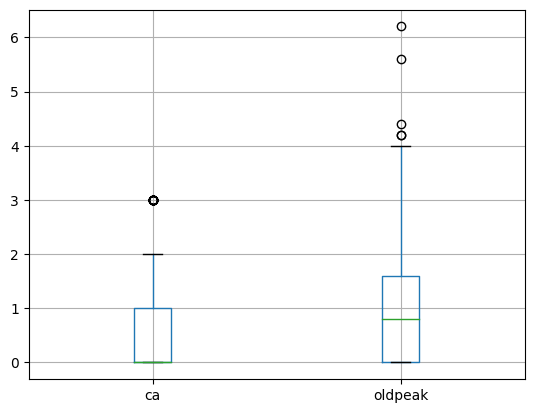

In [58]:
df.boxplot(column=['ca', 'oldpeak'])
plt.show()

In [59]:
df = df[(df["ca"]<=2)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


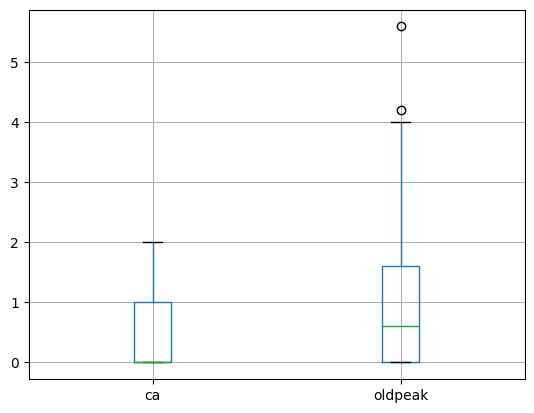

In [60]:
df.boxplot(column=['ca', 'oldpeak'])
plt.show()